Observations and Insights:

# Toolkit and File Setup

In [105]:
# Import Dependencies and Modules
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


# Load Files
mouse_metadata_path = "/Users/brianroberts1/Documents/GitHub/matplotlib_challenge/Mouse_metadata.csv"
study_results_path = "/Users/brianroberts1/Documents/GitHub/matplotlib_challenge/Study_results.csv"

# Read the Mouse Data and Study Results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_and_study = pd.merge(mouse_metadata, study_results,on = ["Mouse ID"])

# Display the data table for preview
mouse_and_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


# Data Cleaning

In [106]:
# Checking the number of mice for duplicates. 

# Based on the study_results, each mouse should have 10 entries,...
# ... any more should be considered a recording error and removed.  
mouse_and_study['Mouse ID'].value_counts()


g989    13
v991    10
y793    10
a262    10
c758    10
        ..
h428     1
f932     1
b447     1
n482     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [107]:
### Remove data for Mouse ID: g989, as it has more than 10 entries ###

# Filter the rows that contain 'g989' and store the indexes
drop_ids = mouse_and_study[mouse_and_study['Mouse ID'] == 'g989'].index

# Delete matching row indexes from the dataframe
mouse_and_study.drop(drop_ids, inplace = True)

# Check cleaned dataframe
mouse_and_study['Mouse ID'].value_counts()


# As you can see below, 'g989' was successfully removed from the dataset. 

v991    10
y163    10
m650    10
j984    10
k403    10
        ..
u153     1
d133     1
h428     1
l872     1
f932     1
Name: Mouse ID, Length: 248, dtype: int64

# Summary Statistics

In [108]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#--------------------------------------------------------------------------------------------------------

# Calculate and Group the mean of tumor growth for each drug regimen.
tumor_means = mouse_and_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

# Calculate and Group the median of tumor growth for each drug regimen.
tumor_medians = mouse_and_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

# Calculate and Group the variance of tumor growth for each drug regimen.
tumor_vars = mouse_and_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()

# Calculate and Group the standard deviation of tumor growth for each drug regimen.
tumor_stds = mouse_and_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()

# Calculate and Group the SEM of tumor growth for each drug regimen.
tumor_sems = mouse_and_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary dataframe.
#---------------------------------------------------------------
tumor_summary = pd.DataFrame({"Mean":tumor_means, "Median":tumor_medians, "Variance":tumor_vars, 
                              "Standard Deviation":tumor_stds, "SEM":tumor_sems})
tumor_summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [124]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summ = mouse_and_study.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

agg_summ

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

Text(0, 0.5, 'Total Mice')

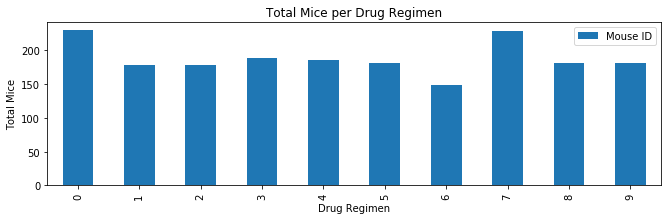

In [122]:
# Generate a bar plot showing the total number of mice tested on each drug regimen using pandas.(DataFrame.plot())

group_drugs = pd.DataFrame(mouse_and_study.groupby(['Drug Regimen']).count()).reset_index()


mice_drugs = group_drugs[['Drug Regimen','Mouse ID']]
mice_drugs.plot(kind='bar',figsize=(11,3))
plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")


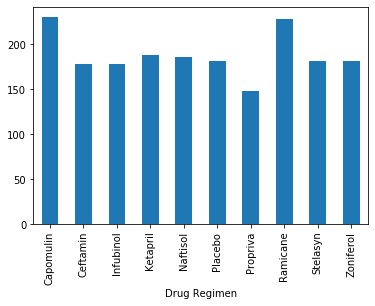

In [128]:
tot_mouse_drug = mouse_and_study.groupby('Drug Regimen')['Mouse ID'].count()
tot_mouse_drug.plot(kind='bar')


<BarContainer object of 10 artists>

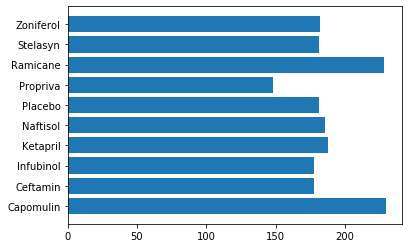

In [130]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.barh(tot_mouse_drug.index,tot_mouse_drug)


''

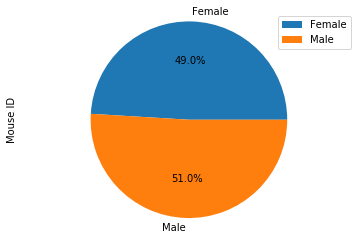

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
tot_mouse_sex = mouse_and_study.groupby('Sex')['Mouse ID'].count()
tot_mouse_sex.plot(kind='pie',autopct='%1.1f%%')
legend_s = tot_mouse_sex.index
plt.legend(legend_s,loc="best")
plt.axis("equal");


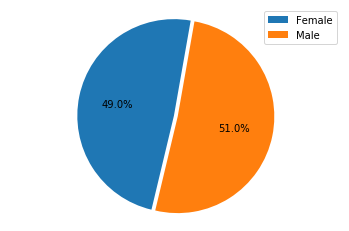

In [152]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(tot_mouse_sex, autopct='%1.1f%%',startangle = 80,explode=(0.02, 0.02))
#plt.title("")
legend_s = tot_mouse_sex.index
plt.legend(legend_s,loc="upper right")
plt.axis("equal");

# Quartiles, Outliers, and Boxplots

In [155]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
qob_drug_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

qob_drug_df = mouse_and_study.loc[mouse_and_study["Drug Regimen"].isin(qob_drug_list)]

# Start by getting the last (greatest) timepoint for each mouse
qob_mouse_df = qob_drug_df.groupby("Mouse ID")["Timepoint"].max()
qob_mouse_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
qob_merged = pd.merge(qob_mouse_df,qob_drug_df,on=["Mouse ID","Timepoint"])
qob_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [159]:
# Put treatments into a list for for loop (and later for plot labels)
qob_drug_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_final_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in qob_drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    row_vol = qob_merged.loc[qob_merged["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_final_vol.append(row_vol)
    
    # Determine outliers using upper and lower bounds
    
    
    quartiles = row_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    #print(f"The lower quartile of temperatures is: {lowerq}")
    #print(f"The upper quartile of temperatures is: {upperq}")
    #print(f"The interquartile range of temperatures is: {iqr}")
    #print(f"The the median of temperatures is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #print(f"Values below {lower_bound} could be outliers.")
    #print(f"Values above {upper_bound} could be outliers.")
    
    outliers = row_vol.loc[(row_vol<lower_bound)|(row_vol>upper_bound)]
    
    print(f"{drug}{outliers}")
    

CapomulinSeries([], Name: Tumor Volume (mm3), dtype: float64)
RamicaneSeries([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol15    36.321346
Name: Tumor Volume (mm3), dtype: float64
CeftaminSeries([], Name: Tumor Volume (mm3), dtype: float64)


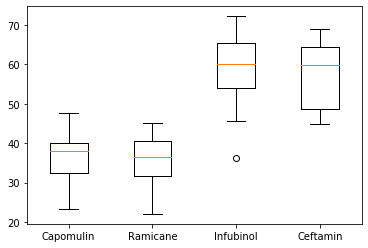

In [161]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_final_vol,labels=qob_drug_list);

# Line and Scatter Plots

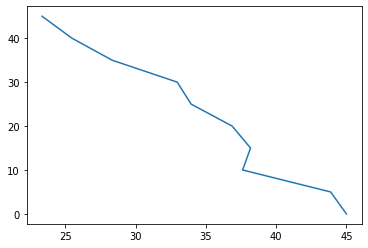

In [165]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_df = mouse_and_study.loc[mouse_and_study["Drug Regimen"]=="Capomulin"]

#s185
capo_s185 = capo_df.loc[capo_df["Mouse ID"]=="s185"]
plt.plot(capo_s185["Tumor Volume (mm3)"],capo_s185["Timepoint"])



In [117]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


# Correlation and Regression

In [118]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
